<a href="https://colab.research.google.com/github/Eshwarnaik23/Malaria-Detection-Using-CNN-Based-Image-Classification/blob/main/Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Malaria Detection

In [1]:
#Let us keep all the libraries ready
import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D,  Activation
from tensorflow.keras.layers import Reshape, Input, Lambda
from tensorflow.keras.layers import Conv2D, Convolution2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Concatenate, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from matplotlib.pyplot import imshow, imsave
import imageio
import random
import urllib.request

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

##Importing data


In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':"119UU7nc57Ng4L8-69hnXiiIcmOU8nzJT"})
downloaded.GetContentFile('cell_images.zip')

In [3]:
!unzip -qq 'cell_images.zip'
!ls ./cell_images

Parasitized  Uninfected


## Sample Images

### Infected Cells - sample images

(115, 136, 3)
(103, 106, 3)
(115, 115, 3)
(151, 118, 3)


<ipython-input-4-6e8fa3b8fea5>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(location+"C46P7ThinF_IMG_20151130_210743_cell_154.png")
<ipython-input-4-6e8fa3b8fea5>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(location+"C39P4thinF_original_IMG_20150622_111942_cell_7.png")
<ipython-input-4-6e8fa3b8fea5>:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread`

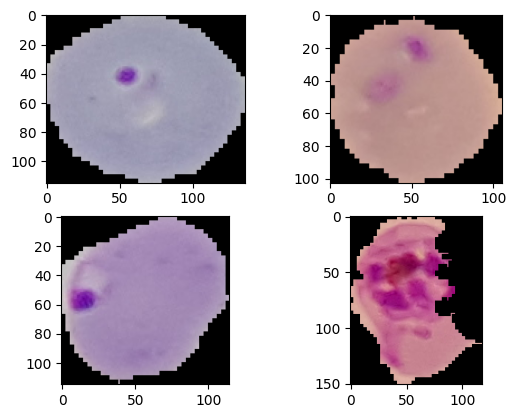

In [4]:
fig, ax = plt.subplots(2,2)
location='./cell_images/Parasitized/'

img=imageio.imread(location+"C46P7ThinF_IMG_20151130_210743_cell_154.png")
print(img.shape)
ax[0,0].imshow(img)

img=imageio.imread(location+"C39P4thinF_original_IMG_20150622_111942_cell_7.png")
print(img.shape)
ax[0,1].imshow(img)

img=imageio.imread(location+"C189P150ThinF_IMG_20151203_141615_cell_93.png")
print(img.shape)
ax[1,0].imshow(img)

img=imageio.imread(location+"C143P104ThinF_IMG_20151005_225413_cell_181.png")
print(img.shape)
ax[1,1].imshow(img)


### Un-infected Cell - Sample images

(130, 112, 3)
(112, 106, 3)
(118, 112, 3)
(130, 127, 3)


<ipython-input-5-ae12e16d4e0d>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(location+"C2NThinF_IMG_20150604_114631_cell_38.png")
<ipython-input-5-ae12e16d4e0d>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(location+"C189P150ThinF_IMG_20151203_141455_cell_51.png")
<ipython-input-5-ae12e16d4e0d>:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directl

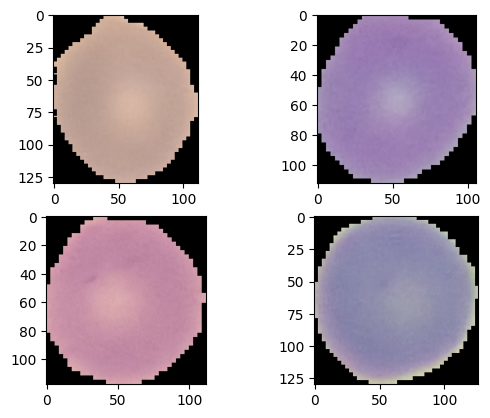

In [5]:
fig, ax = plt.subplots(2,2)
location='./cell_images/Uninfected/'

img=imageio.imread(location+"C2NThinF_IMG_20150604_114631_cell_38.png")
print(img.shape)
ax[0,0].imshow(img)

img=imageio.imread(location+"C189P150ThinF_IMG_20151203_141455_cell_51.png")
print(img.shape)
ax[0,1].imshow(img)

img=imageio.imread(location+"C5NThinF_IMG_20150609_122108_cell_117.png")
print(img.shape)
ax[1,0].imshow(img)

img=imageio.imread(location+"C149P110ThinF_IMG_20151115_114910_cell_237.png")
print(img.shape)
ax[1,1].imshow(img)


## Train and Test Data Generation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
########################
# Data generator : Any preprocessing options/steps can be  defined here
########################
datagen = ImageDataGenerator(rescale = 1./255,  # scaling the images matrix(standard preprocessing step)
                             validation_split=0.2) # set validation split
width = 128
height = 128

In [8]:
trainDatagen = datagen.flow_from_directory(directory='/content/cell_images',
                                           target_size=(width,height),  # resizing the input images to a specific size
                                           class_mode = 'binary', #binary or categorical
                                           batch_size = 256,
                                           subset='training')  # set as training data

Found 22048 images belonging to 2 classes.


In [9]:
valDatagen = datagen.flow_from_directory(directory='/content/cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 256,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


## Model Building

In [10]:
model = Sequential()
model.add(Conv2D(8,(3,3),activation='relu',input_shape=(width,height,3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,569 (1.55 MB)

 Trainable params: 407,569 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer ='adam',  loss =keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [13]:
model.fit(
        trainDatagen,
        steps_per_epoch = len(trainDatagen), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=10,
        validation_data =  valDatagen,
        validation_steps = len(valDatagen), #total number of batches in validation(validation observation/batch size)
        verbose=1
        )

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.9383 - loss: 0.1856 - val_accuracy: 0.9338 - val_loss: 0.1914
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.9353 - loss: 0.1827 - val_accuracy: 0.9348 - val_loss: 0.1869
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.9380 - loss: 0.1876 - val_accuracy: 0.9397 - val_loss: 0.1755
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.9440 - loss: 0.1736 - val_accuracy: 0.9370 - val_loss: 0.1818
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 268s 3s/step - accuracy: 0.9423 - loss: 0.1761 - val_accuracy: 0.9401 - val_loss: 0.1740
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 256s 3s/step - accuracy: 0.9444 - loss: 0.1693 - val_accuracy: 0.9363 - val_loss: 0.1791
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.9453 - loss: 0.1679 - val_accuracy: 0.9437 - val_loss: 0.1675
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step - accuracy: 0.9457 - loss: 0.1634 - val_accuracy: 0.9348 - v

In [16]:
model.save_weights('model_10epochs.weights.h5')

model.fit(
    trainDatagen,
    steps_per_epoch=len(trainDatagen), #total number of batches in one train epoch (train observation / batch size; also called iterations per epoch)
    epochs=1,
    validation_data=valDatagen,
    validation_steps=len(valDatagen), #total number of batches in validation(validation observation / batch size)
    verbose=1
)

87/87 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.9536 - loss: 0.1516 - val_accuracy: 0.9403 - val_loss: 0.1644


## Prediction on new data

In [27]:
urllib.request.urlretrieve("https://github.com/Eshwarnaik23/Malaria-Detection-Using-CNN-Based-Image-Classification/blob/main/cell_images_extra.zip")
!unzip -qq 'cell_images_extra.zip'

image_path = '/content/cell_images_extra'
model.load_weights("model_10epochs.weights.h5")

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        image_path,
        target_size=(width, height),
        batch_size=1,
        class_mode='binary',
        shuffle=False)

len(test_generator)

# Predict from generator (returns probabilities)
pred=model.predict(test_generator, steps=len(test_generator), verbose=1)

# Get classes by np.round
cl = np.round(pred)
# Get filenames (set shuffle=false in generator is important)
filenames=test_generator.filenames

# Data frame
results=pd.DataFrame({"file":filenames,"pr":pred[:,0], "class":cl[:,0]})
print(results)

replace cell_images_extra/cell_images_new/C1_thinF_IMG_20150604_105100_cell_151.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cell_images_extra/cell_images_new/C2NThinF_IMG_20150604_115238_cell_249.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cell_images_extra/cell_images_new/C38P3thinF_original_IMG_20150621_112116_cell_204.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cell_images_extra/cell_images_new/C39P4thinF_original_IMG_20150622_105102_cell_83.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cell_images_extra/cell_images_new/C39P4thinF_original_IMG_20150622_105102_cell_85.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cell_images_extra/cell_images_new/C39P4thinF_original_IMG_20150622_105253_cell_93.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cell_images_extra/cell_images_new/C3thin_original_IMG_20150608_163002_cell_32.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
Found 7 images belonging to 1 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
 

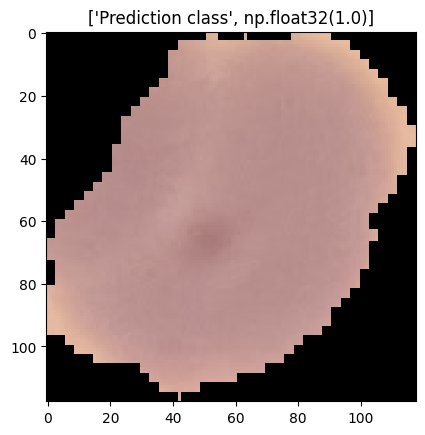

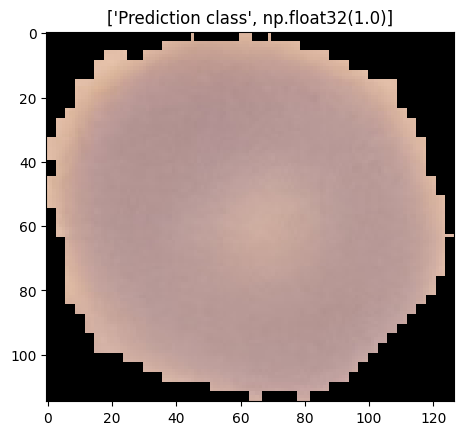

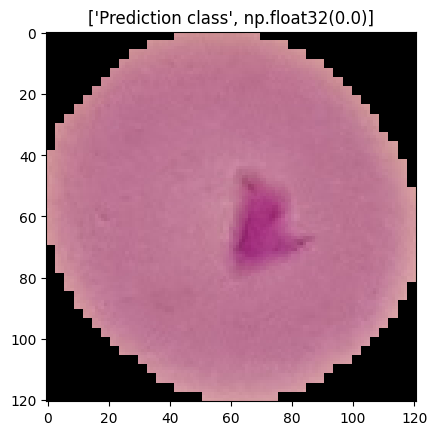

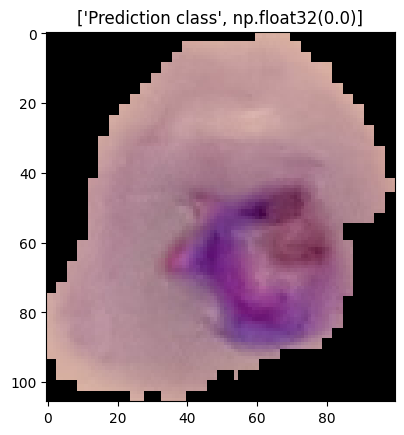

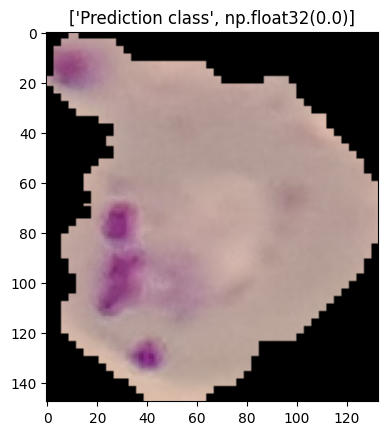

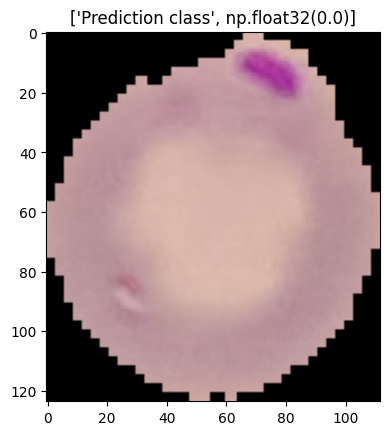

In [28]:
%matplotlib inline
location='/content/cell_images_extra/'

for i in range(0,6):
  plt.figure()
  plt.title(["Prediction class",results.iloc[i,2]])
  x=plt.imread(location+results.iloc[i,0])
  plt.imshow(x)

